#### packages

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [7]:
pd.options.display.float_format = '{:.5f}'.format

In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [9]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [10]:
df_copy = df.copy()

##### 수도권에 취업한 사람 중 비수도권 대학은 없음

In [11]:
수도권 = df_copy[(df_copy['사업체지역']=='서울')|(df_copy['사업체지역']=='경기')].copy()

model = sm.Logit.from_formula('''LongWork2 ~ C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))''', 수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.363320
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.02125
Time:                        20:15:41   Log-Likelihood:                -847.62
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 1.019e-08
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.0843      0.099    -21.110      0.000      -2.278      -1.891
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.9265      0.147      6.291      0.000       0.638       1.215
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]            -0.1744      0.133     -1.307      0.191      -0.436       0.087
==================================================================================================================
"""

In [11]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1558.47261991283




,OR,Lower CI,Upper CI
Intercept,0.11531,0.09422,0.14112
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.21665,1.62124,3.03071
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",0.85467,0.64872,1.12601


In [12]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    +  C(보험가입여부,Treatment('가입하지않음')) + 주당근로시간''', 수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.361594
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2329
Method:                           MLE   Df Model:                            3
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.02590
Time:                        20:17:20   Log-Likelihood:                -843.60
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 9.924e-10
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.6527      0.175     -9.443      0.000      -1.996      -1.310
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.9824      0.150      6.553      0.000       0.689       1.276
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]            -0.0260      0.146     -0.179      0.858      -0.311       0.259
주당근로시간                                            -0.0155      0.005     -2.847      0.004      -0.026      -0.005
==================================================================================================================
"""

In [13]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1695.1962478327007




,OR,Lower CI,Upper CI
Intercept,0.19153,0.13591,0.26990
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.67082,1.99085,3.58303
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",0.97432,0.73254,1.29591
주당근로시간,0.98458,0.97411,0.99517


In [14]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))
    + 주당근로시간 + C(직장만족도,Treatment('그렇지않다'))''', 수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.352672
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2327
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.04993
Time:                        20:19:11   Log-Likelihood:                -822.78
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 3.676e-17
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.3523      0.249     -9.466      0.000      -2.839      -1.865
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.8454      0.152      5.551      0.000       0.547       1.144
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.0320      0.145      0.220      0.826      -0.253       0.317
C(직장만족도, Treatment('그렇지않다'))[T.그렇다]                0.9633      0.186      5.192      0.000       0.600       1.327
C(직장만족도, Treatment('그렇지않다'))[T.보통이다]               0.1975      0.200      0.988      0.323      -0.194       0.589
주당근로시간                                            -0.0099      0.006     -1.796      0.073      -0.021       0.001
==================================================================================================================
"""

In [15]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

모델 AIC:1657.568845387179




,OR,Lower CI,Upper CI
Intercept,0.09515,0.05846,0.15485
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.32893,1.72787,3.13908
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.03249,0.77633,1.37318
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",2.62036,1.82150,3.76956
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",1.21832,0.82334,1.80279
주당근로시간,0.99011,0.97942,1.00091


In [16]:
odds_ratios_3.index = ['절편', '직장에서의복리후생제공여부, REF:제공하지않는다|제공한다',
       '보험가입여부, REF:가입하지않음|가입했다',
       '직장만족도, REF:그렇지않다|그렇다',
       '직장만족도, REF:그렇지않다:보통이다', '주당근로시간']

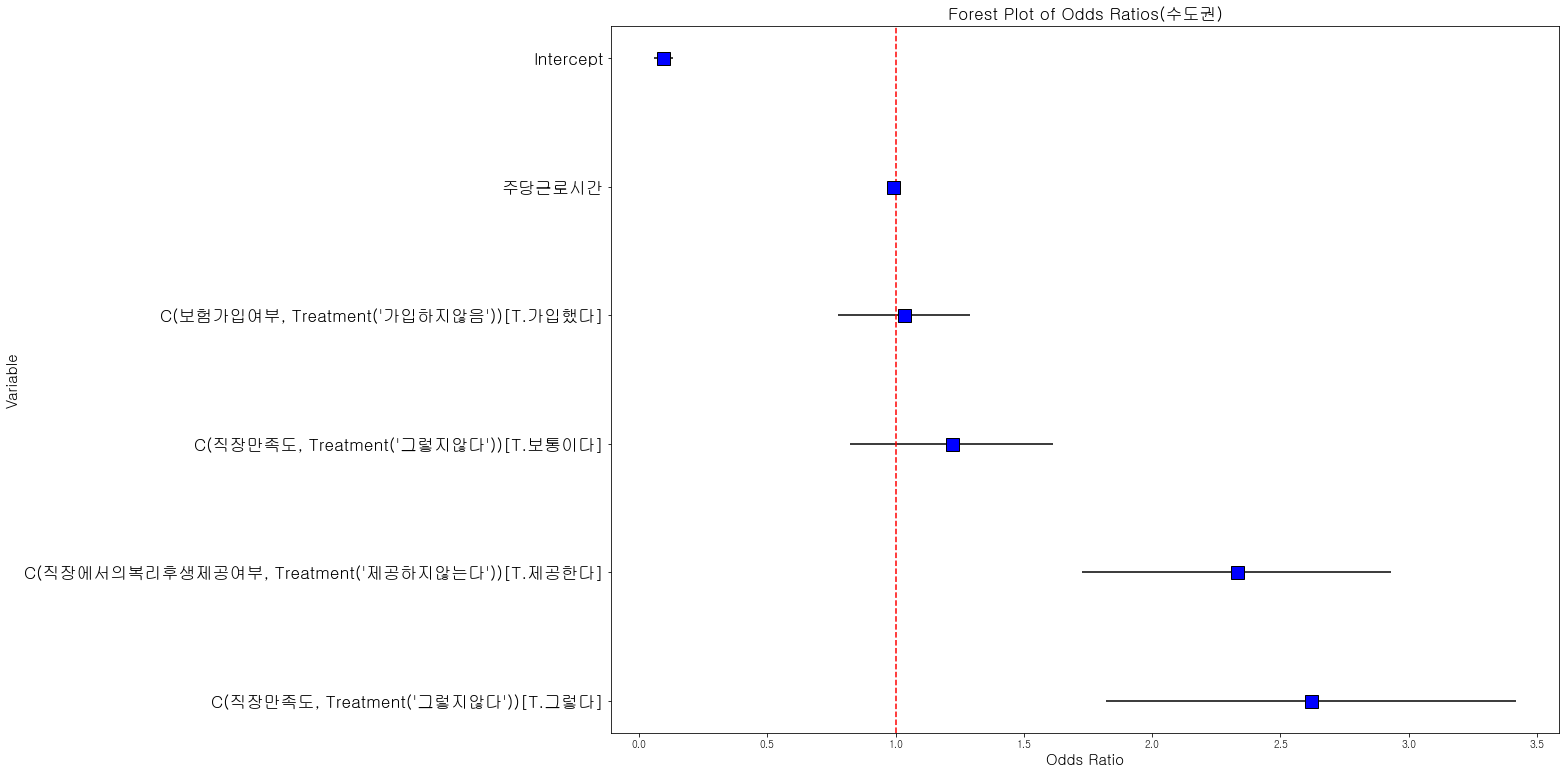

In [16]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(수도권)', fontsize=17)

# Show the plot
plt.show()

##### 단변-------------

In [ ]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    ''', 수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.441252
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01653
Time:                        20:08:38   Log-Likelihood:                -125.32
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                   0.04014
                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.16990,0.11873,0.24312
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.27834,1.06913,4.85519


In [18]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(보험가입여부,Treatment('가입하지않음'))
    ''', 수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.371205
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2331
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:               4.940e-06
Time:                        20:32:17   Log-Likelihood:                -866.02
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                    0.9263
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.13824,0.11457,0.16679
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.01186,0.78810,1.29915


In [19]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
   주당근로시간''', 수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.370399
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2331
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.002176
Time:                        20:32:38   Log-Likelihood:                -864.14
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                   0.05220
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.65

,OR,Lower CI,Upper CI
Intercept,0.19149,0.13668,0.26829
주당근로시간,0.99067,0.98143,1.00000


In [20]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(직장만족도,Treatment('그렇지않다'))''', 수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.359317
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03203
Time:                        20:32:58   Log-Likelihood:                -838.29
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 8.976e-13
                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.07790,0.05712,0.10624
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",2.96521,2.08176,4.22359
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",1.27392,0.86437,1.87753
